# Predictive Maintenance

## Inleiding

**Auteurs:** R. Coenen, Y. Dera, M. Vliex & S. van Wesel <br>
**TODO** Inleiding verder afschrijven

## Inhoudsopgave

* [1. Data selectie](#DataSelectie)
* [1.1. Achtergrond informatie](#AchtergrondInfo)
* [1.2. Theoretisch kader](#TheoretischKader)
* [1.3. Doel](#Doel)
* [2. Data preparatie](#DataPreparatie)
* [2.1. Data profiling](#DataProfiling)
* [2.2. Data Cleaning](#DataCleaning)
* [2.3. Data Wrangling](#DataWrangling)
* [3. Uitwerkingen en algoritmen](#Uitwerkingen)

---

# 1. Data selectie <a class="anchor" id="DataSelectie"></a><br>
Vanuit de opdrachtgever is vraag gekomen aan de slag te gaan met machine learning op het gebied van predictive maintenance. Hierbij heeft de opdrachtgever de projectgroep in staat gesteld op zoek te gaan naar een dataset die betrekking heeft op het voorspellen van onderhoud van machines. De aard van deze machines is vrij om te kiezen, ook zal de projectgroep zich gaan verdiepen in specifieke machines.

## 1.1. Achtergrond informatie <a class="anchor" id="AchtergrondInfo"></a>
De dataset die gehanteerd wordt voor het onderzoek is gevonden via [Kaggle](https://www.kaggle.com/) met de naam "Microsoft Azure Predictive Maintenance". De dataset is te raadplegen via de [*Website van Kaggle*](https://www.kaggle.com/arnabbiswas1/microsoft-azure-predictive-maintenance) {1}. De dataset is een verzameling van een totaal van 5 bestanden met een totaal van 18 kolommen die overlap met elkaar kennen. Hiermee wordt bedoelt dat in sommige kollomen dezelfde kolomnamen terugkomen (een voorbeeld hiervan is het machineID). Hiernaast is de bron oorspronkelijk afkomstig van [Azure AI Notebooks for predictive Maintenance](https://docs.microsoft.com/nl-nl/azure/architecture/data-science-process/predictive-maintenance-playbook#training-resources-for-predictive-maintenance) {2}, maar aangezien de downloadlink niet meer op de site van Azure te vinden is, is deze beschikbaar gesteld op Kaggle. Op basis van de 18 kolommen is het mogelijk onderhoud van machines te voorspellen, wat deze kolommen betekenen is terug te vinden in [paragraaf 2.1.2.](#TyperenData). 

Aan de projectgroep is de opdracht verstrekt om op zoek te gaan naar een dataset die betrekking heeft op de monitoring van apparatuur/machines in combinatie met sensoren. Op basis van deze sensor informatie zou o.a. een predictie gemaakt kunnen worden over de resterende levensduur van een apparaat en/of component evenals wanneer onderhoud wenselijk is. 

De doelstelling is, om op basis van een (preprocessed) dataset een onderzoek uit te voeren en een pipeline te realiseren die aan de slag gaat met deze (ruwe) data en dit omzet naar een predictie model. Dit binnen een Jupyter Notebook en in combinatie met Python scripts.

In een introductie gesprek zijn de volgende 3 typeringen van onderhoud aan bod gekomen:

<b>Reactive (reactief)</b> - Onderhoud uitvoeren zodra er een probleem is<br>
Probleem: onverwachte storingen kunnen duur (kosten) en potentieel gevaarlijk zijn

<b>Scheuduled (gepland)</b> - Onderhoud uitvoeren op basis van een (regelmatig) schema<br>
Probleem: onnodig onderhoud kan verspilling zijn; mogelijk worden niet alle storingen verholpen

<b>Predictive (voorspellend)</b> - Voorspellen wanneer zich problemen zullen voordoen<br>
Probleem: moeilijk om nauwkeurige voorspellingen te doen voor complexe apparatuur

Kortweg gezegd is het doel om kosten te verminden door te voorspellen wanneer onderhoud nodig is. 

De projectgroep is aan de slag gegaan met het zoeken naar datasets en eenieder heeft verschillende datasets ingebracht om mee aan te slag te gaan. Vervolgens is de keuze gemaakt voor één dataset, de Microsoft Azure Predictive Maintenance dataset, zoals beschikbaar gesteld op <a href="https://www.kaggle.com/arnabbiswas1/microsoft-azure-predictive-maintenance" title="Azure dataset">Kaggle</a>. 

Deze (voorbeeld) data is afkomstig van het Microsoft project "Azure AI Notebooks for Predictive Maintenance" (welke per 15 oktober 2020 beëndigd is). De data is echter nog altijd toegankelijk om te gebruiken.

Deze dataset kan volgens Microsoft gebruikt worden om aan te slag te gaan met machine learning models gerelateerd aan predictive maintenance, ofwel het voorspellen van onderhoud.

De dataset bestaat uit een vijftal CSV (door komma gescheiden) bestanden, namelijk errors, fouten, machines, onderhoud en telemetrie en beslaat bijna een miljoen rijen.

Iets dieper uitgediept zien de datasets er als volgt uit:

• <b>Machinecondities en -gebruik</b>: Geeft de omstandigheden van de machine in gebruik weer, bijvoorbeeld door sensoren verzamelde gegevens;<br>
• <b>Faal geschiedenis</b>: De storingshistorie van een machine of een component binnen de machine;<br>
• <b>Onderhoudshistorie</b>: De reparatiegeschiedenis van een machine, bijvoorbeeld foutcodes, eerdere onderhoudsactiviteiten of vervanging van componenten.<br>
• <b>Machine eigenschapen</b>: De kenmerken van een machine, bijv. CPU, merk en model, locatie.

Op detailniveau bestaan de CSV bestanden uit de volgende gegevens:<br><br>
• <b>Telemetrie tijd data</b>: Bevat data, op uur niveau, over de rotatie, druk en trillingen; verzameld over 10 machines (in het jaar 2015);<br>
• <b>Error</b>: Dit zijn fouten die de machines ondervinden wanneer ze in werking/actief zijn. Aangezien deze fouten de machines niet uitschakelen, worden zij niet als verstoringen beschouwd. (De foutdatum en -tijd worden afgerond op het dichtstbijzijnde uur, aangezien de telemetriegegevens om het uur worden verzameld);<br>
• <b>Onderhoud</b>: Wanneer een onderdeel van een machine wordt vervangen, wordt dat als een record in deze tabel vastgelegd. Componenten worden in twee situaties vervangen:<br><br> 
-> 1. Tijdens het reguliere geplande bezoek vervangt de technicus het onderdeel (proactief onderhoud);<br><br>
-> 2. Een onderdeel gaat kapot en de technicus voert een ongepland onderhoud uit om het onderdeel te vervangen (reactief onderhoud). (Dit wordt beschouwd als een storing en de overeenkomstige gegevens worden vastgelegd onder verstoringen. De onderhoudsgegevens hebben zowel betrekking op 2014 als op 2015. Deze gegevens worden afgerond op het dichtstbijzijnde uur, aangezien de telemetriegegevens om het uur worden verzameld).<br><br>
• <b>Verstoringen</b>: Elk record staat voor de vervanging van een onderdeel als gevolg van een defect. Deze gegevens zijn een deelverzameling van de onderhoudsgegevens. (Deze gegevens worden afgerond op het dichtstbijzijnde uur, aangezien de telemetriegegevens om het uur worden verzameld)<br>
• <b>Metadata</b>: Model type en leeftijd van de machines

---

## 1.2. Theoretisch kader <a class="anchor" id="TheoretischKader"></a><br>

> Inhoud
> + [Introductie](#TKIntroductie)
> + [Predictive Maintenance](#TKPredictiveMaint)

### Introductie <a class="anchor" id="TKIntroductie"></a>

### 1.2.1. Predictive maintenance <a class="anchor" id="TKPredictiveMaint"></a>
Predictive maintenance is een techniek dat gebruik maakt van data analyse tools en technieken om afwijkingen in een organisatie en mogelijke gebreken in apparatuur en processen vroegtijdig te detecteren zodat deze afgehandeld kunnen worden nog vóór dat deze resulteren in een fout. [FiixSoftware.com](https://www.fiixsoftware.com/maintenance-strategies/predictive-maintenance/) {3}. Enerzijds focust predictive maintenance zich op het voorkomen van [reactive maintenance]([#TKReactiveMaint](https://www.fiixsoftware.com/maintenance-strategies/reactive-maintenance/)), waarbij het anderzijds de kosten voor [preventive maintenance]([#TKPreventiveMaint](https://www.fiixsoftware.com/maintenance-strategies/preventative-maintenance/)) probeert te verlagen.

## 1.3. Doel <a class="anchor" id="Doel"></a><br>
Het doel van het project betreft het inzichtelijk maken van de mogelijkheden van het gebruik van machine learning binnen predictive maintenance richting de opdrachtgever. Hierbij zal de projectgroep zich verdiepen in een open dataset (waarover de opdrachtgever geen kennis noch eigendom heeft), gericht op predictive maintenance. Dit betekent dat vanuit het perspectief van data gezocht wordt naar inzichten en er geen specifiek probleem aanwezig is. Hiermee wordt het project gekenmerkt met een data driven benadering.

---

In [19]:
import pandas as pd
import seaborn as sb

# 2. Data preparatie <a class="anchor" id="DataPreparatie"></a><br>
Het volgende hoofdstuk behandeld deze viertal fases en beschrijft de activiteiten die plaats hebben gevonden binnen deze fases.

## 2.1. Data profiling <a class="anchor" id="DataProfiling"></a><br>
Data profiling is van belang eerste inzichten te krijgen, deze paragraaf gaat in op het inladen van de data en de eerste inzichten verkrijgen waarna de paragraaf [visuele inzichten](#VisInzicht) (na het [samenvoegen van de data](#DataWrangling)) ingaat op visualisaties die van belang zijn nog vóór het trainen van de modellen. Ook worden de attributen van de dataset beschreven die later mogelijk als feature gedefinieerd worden om een goed beeld te krijgen wat de waardes in de kolommen voorstellen. Hiervoor is een data dictionary opgesteld in deze paragraaf. 

### 2.1.1. Inladen van de data <a class="anchor" id="InladenData"></a><br>
Om aan de slag te kunnen gaan met de data, dient deze eerst ingeladen te worden. Deze dataset, afkomstig van Kaggle, bevat een cijftal .CSV (kommagescheiden) bestanden, die in zijn totaliteit uit 18 kolommen en 876.100 rijen bestaat. Het inladen van de data kan gebeuren aan de hand van de Pandas module binnen Python. Hiervoor wordt de regel code ```import pandas as pd``` uitgevoerd. Hiermee wordt de Pandas module geïmporteerd en hernoemd naar 'pd' zodat de module met deze afkorting aangeroepen kan worden i.p.v. het voluit schrijven van de modulenaam. Wanneer Pandas is geïmporteerd kunnen de bronbestanden ingeladen worden in allen een aparte dataframe. Dit gebeurd middels de volgende regels code: 

```
dfTelemetry = pd.read_csv ('Data\PdM_telemetry.csv')
dfErrors = pd.read_csv ('Data\PdM_errors.csv')
dfFailures = pd.read_csv ('Data\PdM_failures.csv')
dfMachines = pd.read_csv ('Data\PdM_machines.csv')
dfMaint = pd.read_csv ('Data\PdM_maint.csv')
```

In [20]:
import pandas as pd

In [21]:
dfTelemetry = pd.read_csv ('Data\PdM_telemetry.csv')
dfErrors = pd.read_csv ('Data\PdM_errors.csv')
dfFailures = pd.read_csv ('Data\PdM_failures.csv')
dfMachines = pd.read_csv ('Data\PdM_machines.csv')
dfMaint = pd.read_csv ('Data\PdM_maint.csv')

Deze regels code zorgen ervoor dat de juiste CSV (kommagescheiden bestanden) ingeladen worden. Deze code zorgt er voor dat er een "data frame object" terug gegeven wordt; dit kan gezien worden als een soort van Excel bestand. De df(naam) code (bijv. 'dfTelemetry') zorgt ervoor dat deze dataframes snel opgeroepen kunnen worden. Met onderstaande code kan er een voorbeeld van het data frame getoond worden inclusief een vertoning van de rijen en kolommen. In dit geval wordt het dataframe Telemetry (meetgegevens) inzichtelijk gemaakt middels de regel code ```dfTelemetry```.

In [22]:
dfTelemetry

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511
...,...,...,...,...,...,...
876095,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941
876096,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072
876097,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561
876098,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259


### 2.1.2. Typeren van de data <a class="anchor" id="TyperenData"></a>

**Format** <a class="anchor" id="Format"></a><br>
Deze dataset bevat gestructureerde gegevens. Iedere atribuut valt onder een categorie. De dataset zelf bevat, op moment van verkrijgen, nog uit een vijftal losse CSV bestanden. Deze staan los van elkaar en dienen nog, middels relaties, gekoppeld te worden eaan elkaar. Zie voor meer informatie hoofdstuk 2.3 'Data Wrangling'.

**Structuur** <a class="anchor" id="Structuur"></a><br>
Het data format betreft dus een CSV bestand. Een CSV-bestand (door komma’s gescheiden waarden) is een bestandstype, In CSV-bestanden wordt informatie niet in kolommen opgeslagen, maar wordt deze gescheiden door komma’s.

**Context** <a class="anchor" id="Context"></a><br>
De volgende kolommen zijn terug te vinden in de datasets:

*Tabel 1: Data Dictionary*

| Feature   | Omschrijving | Voorbeeld data    | Data Type | Type variabele | Meeteenheid | (Oorspronkelijke) databron |
| ----------| -------------| ----------------- | ----------| ---------------| ------------|  --------------------------|
| machineID | Iedere machine wordt gekenmerkt door een uniek identificatienummer | 1 | Int64 | Kwalitatief (discreet) | n.v.t | PdM_machines.csv |
| model     | Er zijn verschillende soorten modellen, die gekenmerkt worden door een modelnummer | model 3 | text | Kwalitatief (discreet) | n.v.t |PdM_machines.csv |
| age       | De leeftijd van de machines/compontenten | 18 | Int64 | Kwantitatief (discreet) | Maanden | PdM_machines.csv |
| datetime  | Geeft de datum en tijd weer | 3-1-2015 07:00:00 | datetime | Kwantitatief (continue) | Uren, minuten, seconde | PdM_errors.csv     |
| errorID   | Iedere error wordt gekenmerkt door een (uniek) error nummer | error1 | text | Kwalitatief (discreet) | n.v.t | PdM_errors.csv     |
| failure   | Geeft aan welk component gefaald is | comp4 | text | Kwalitatief (discreet) | Binair | PdM_failures.csv |
| comp      | Ieder component wordt gekenmerkt door een componentnummer | comp2 | text | Kwalitatief (discreet) | n.v.t | PdM_maint.csv |
| volt      | De elektrische spanning in volt | 176217853015625 | Int64 | Kwantitatief (continue)| voltage ($V$) | PdM_maint.csv |
| rotate    | Aantal rotaties per minuut | 418504078221616   | Int64 | Kwantitatief (continue) | Rotaties per minuut ($RPM$) | PdM_maint.csv  |
| pressure  | Uitgeoefende druk in Kilo pascal (=0,01 bar) | 113077935462083   | Int64 | Kwantitatief (continue) | Kilo Pascal ($kPa$) (1 kPa = 0,01 bar) | PdM_maint.csv  |
| vibration | Periodieke beweging van een voorwerp of medium | 450876857639276 | Int64 | Kwantitatief (continue) | Herz ($Hz$) | PdM_maint.csv |

**Statistische eigenschappen** <a class="anchor" id="StatisEigen"></a><br>
Statistische eigenschappen geven een beeld van kentallen binnen de statistiek. Hieronder worden onder anderen gemiddelden, standaardafwijkingen, kwartielen en het aantal rijen verstaan. Dit wordt gedaan door de regel code ```<df>.describe()``` uit te voeren. Hier dient aan opgemerkt te worden dat de .describe() functie alleen werkt voor integer datatypes. Een object is niet relevant te berekenen. Hiernaast wordt de regel code ```df.info()``` uitgevoerd om het aantal null-waardes in de kolommen op te vragen. Voor iedere losse tabel worden deze regels code uitgevoerd in onderstaande 5 codeblokken. 


In [23]:
dfTelemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [24]:
# Statistische eigenschappen van MachineID
print(dfErrors.describe())
#Non-null values voor alle kolommen, in totaal 3919 rijen voor alle rijen (geen lege waardes)
print(dfErrors.info())

         machineID
count  3919.000000
mean     51.044654
std      28.954988
min       1.000000
25%      25.000000
50%      51.000000
75%      77.000000
max     100.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3919 non-null   object
 1   machineID  3919 non-null   int64 
 2   errorID    3919 non-null   object
dtypes: int64(1), object(2)
memory usage: 92.0+ KB
None


In [25]:
# Statistische eigenschappen van MachineID
print(dfFailures.describe())
#Non-null values voor alle kolommen, in totaal 761 rijen voor alle rijen (geen lege waardes)
print(dfFailures.info())

        machineID
count  761.000000
mean    51.911958
std     29.515542
min      1.000000
25%     24.000000
50%     51.000000
75%     79.000000
max    100.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   761 non-null    object
 1   machineID  761 non-null    int64 
 2   failure    761 non-null    object
dtypes: int64(1), object(2)
memory usage: 18.0+ KB
None


In [26]:
# Statistische eigenschappen van MachineID en leeftijd van de machine
print(dfMachines.describe())
#Non-null values voor alle kolommen, in totaal 100 rijen voor alle rijen (geen lege waardes)
print(dfMachines.info())

        machineID         age
count  100.000000  100.000000
mean    50.500000   11.330000
std     29.011492    5.856974
min      1.000000    0.000000
25%     25.750000    6.750000
50%     50.500000   12.000000
75%     75.250000   16.000000
max    100.000000   20.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   machineID  100 non-null    int64 
 1   model      100 non-null    object
 2   age        100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB
None


In [27]:
# Statistische eigenschappen van MachineID 
print(dfMaint.describe())
#Non-null values voor alle kolommen, in totaal 3286 rijen voor alle rijen (geen lege waardes)
print(dfMaint.info())

         machineID
count  3286.000000
mean     50.284236
std      28.914478
min       1.000000
25%      25.250000
50%      50.000000
75%      75.000000
max     100.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3286 non-null   object
 1   machineID  3286 non-null   int64 
 2   comp       3286 non-null   object
dtypes: int64(1), object(2)
memory usage: 77.1+ KB
None


In [28]:
# Statistische eigenschappen van MachineID, voltage, rotatie, druk en vibratie
print(dfTelemetry.describe())
#Non-null values voor alle kolommen, in totaal 876.100 rijen voor alle rijen (geen lege waardes)
print(dfTelemetry.info())

           machineID           volt         rotate       pressure  \
count  876100.000000  876100.000000  876100.000000  876100.000000   
mean       50.500000     170.777736     446.605119     100.858668   
std        28.866087      15.509114      52.673886      11.048679   
min         1.000000      97.333604     138.432075      51.237106   
25%        25.750000     160.304927     412.305714      93.498181   
50%        50.500000     170.607338     447.558150     100.425559   
75%        75.250000     181.004493     482.176600     107.555231   
max       100.000000     255.124717     695.020984     185.951998   

           vibration  
count  876100.000000  
mean       40.385007  
std         5.370361  
min        14.877054  
25%        36.777299  
50%        40.237247  
75%        43.784938  
max        76.791072  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     ----

## 2.2. Data Wrangling <a class="anchor" id="DataWrangling"></a>
Data wrangling betreft het op elkaar laten passen van de data. Tot nu toe betreffen het 5 losse datasets die allen op elkaar dienen te passen. Dat zal in deze paragraaf aan bod komen.  

De eerste stap van het op elkaar laten passen is het inzichtelijk maken van het datamodel. Middels gebruik te maken van [Microsoft PowerBI](https://powerbi.microsoft.com/nl-nl/) wordt een model opgesteld waarbij de relaties tussen de tabellen geïdentificeerd kunnen worden. Dit heeft als resultaat het onderstaat Entity Attribute Relation Diagram (EARD):

<img src="img/Oorspronkelijk_dataModel.png" alt="oorspronkelijk datamodel" width="650"/><br>
*Oorspronkelijk datamodel*

In [29]:
#pandas lib for dataframe operations
import pandas as pd
#numpy lib for two-dimensional arrays
import numpy as np
#scikit learn lib for visualising data
import sklearn as sk
#matplot lib for visualising data
import matplotlib.pyplot as plt
from matplotlib import pyplot
#seaborn lib for visualising more fancy which is based on the matplot lib
import seaborn as sb
import math as math
from sklearn.linear_model import LogisticRegression #Imports logistic regression method from sklearn lib.
from sklearn.metrics import classification_report, confusion_matrix #Imports confusion matrix for validation 
from sklearn.model_selection import train_test_split #Importing train_test_split method from scikitlearn

# Loading all data files
dfTelemetry = pd.read_csv ('data\PdM_telemetry.csv')
dfErrors = pd.read_csv ('data\PdM_errors.csv')
dfFailures = pd.read_csv ('data\PdM_failures.csv')
dfMachines = pd.read_csv ('data\PdM_machines.csv')
dfMaint = pd.read_csv ('data\PdM_maint.csv')

#Merging the tables into the dataframe

# #Left join failures on maintenance to create df1
df1 = pd.merge(dfMaint, dfFailures, how='left', left_on=['datetime', 'machineID', 'comp'], right_on = ['datetime', 'machineID', 'failure'])
df1['failure'] = df1['failure'].fillna(0) #indicates maint was not a failure
df1.loc[((df1.failure == 'comp1') | (df1.failure == 'comp2') | (df1.failure == 'comp3') | (df1.failure == 'comp4')), 'failure'] = '1' #indicates maintenance was a failure
df1['failure'] = df1['failure'].astype(int)

# #Clean error table to create df2, df2 = cleansed dfErrors tbl. 
df2 = dfErrors
df2['Error1'] = 0
df2['Error2'] = 0
df2['Error3'] = 0
df2['Error4'] = 0
df2['Error5'] = 0

df2.loc[(df2['errorID'] == 'error1'), 'Error1'] = 1
df2.loc[(df2['errorID'] == 'error2'), 'Error2'] = 1
df2.loc[(df2['errorID'] == 'error3'), 'Error3'] = 1
df2.loc[(df2['errorID'] == 'error4'), 'Error4'] = 1
df2.loc[(df2['errorID'] == 'error5'), 'Error5'] = 1

# df2 = df2.groupby(['machineID', 'datetime']).sum() #Groups on all cols.
df2 = df2.groupby(['datetime', 'machineID'])[[f'Error{n}' for n in range (1,6)]].sum() #Groups errorID cols only
df2

##Create df3 by joining dfTelemetry on df2
df3 = pd.merge(dfTelemetry, df2, how='left', left_on=['machineID', 'datetime'], right_on=['machineID', 'datetime'])

df3['Error1'] = df3['Error1'].fillna(0)
df3['Error2'] = df3['Error2'].fillna(0)
df3['Error3'] = df3['Error3'].fillna(0)
df3['Error4'] = df3['Error4'].fillna(0)
df3['Error5'] = df3['Error5'].fillna(0)

df3.Error1 = df3.Error1.astype(int)
df3.Error2 = df3.Error2.astype(int)
df3.Error3 = df3.Error3.astype(int)
df3.Error4 = df3.Error4.astype(int)
df3.Error5 = df3.Error5.astype(int)

## Create df4 by joining machines on df3
df4 = pd.merge(dfMachines, df3, how='right', left_on=['machineID'], right_on=['machineID'])
df4

##Create dfSmall by inner joining df1 on df4
dfSmall = pd.merge(df1, df4)
# dfSmall

## Create df5 by joining df1 on df4
df5 = pd.merge(df1, df4, how='right', left_on=['machineID', 'datetime'], right_on=['machineID', 'datetime'])
df = df5
# df
dfSmall

,datetime,machineID,comp,failure,model,age,volt,rotate,pressure,vibration,Error1,Error2,Error3,Error4,Error5
0,2015-01-05 06:00:00,1,comp4,1,model3,18,179.303153,499.777962,111.833028,52.383097,0,0,0,0,0
1,2015-01-05 06:00:00,1,comp1,0,model3,18,179.303153,499.777962,111.833028,52.383097,0,0,0,0,0
2,2015-01-20 06:00:00,1,comp3,0,model3,18,157.774510,442.816748,105.160692,42.135127,0,0,0,0,0
3,2015-01-20 06:00:00,1,comp1,0,model3,18,157.774510,442.816748,105.160692,42.135127,0,0,0,0,0
4,2015-02-04 06:00:00,1,comp4,0,model3,18,198.120032,438.210053,89.040265,41.887215,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,2015-10-10 06:00:00,100,comp3,0,model4,5,191.267582,452.270685,110.231390,39.153878,0,0,0,0,0
2882,2015-10-25 06:00:00,100,comp4,0,model4,5,153.588549,413.098829,95.530613,43.282421,0,0,0,0,0
2883,2015-11-09 06:00:00,100,comp4,0,model4,5,145.024948,364.167929,95.938735,41.263920,0,0,0,0,0
2884,2015-12-09 06:00:00,100,comp2,1,model4,5,144.720190,377.188361,109.995936,28.433400,0,0,0,0,0


## 2.3. Feature engineering en selectie <a class="anchor" id="FeatureEngine"></a><br>
Deze paragraaf gaat in op het achterhalen van correlaties in de kolommen van de gehele dataset (df). Hiernaast wordt target- en feature selectie gedaan waarna visuele inzichten van deze kolommen worden gemaakt. Op deze manier wordt er gericht inzicht verkregen in de kolommen van de dataset en ontstaat er een beeld van het doel van het voorspellen. 

### 2.3.1. Correlatie heatmap

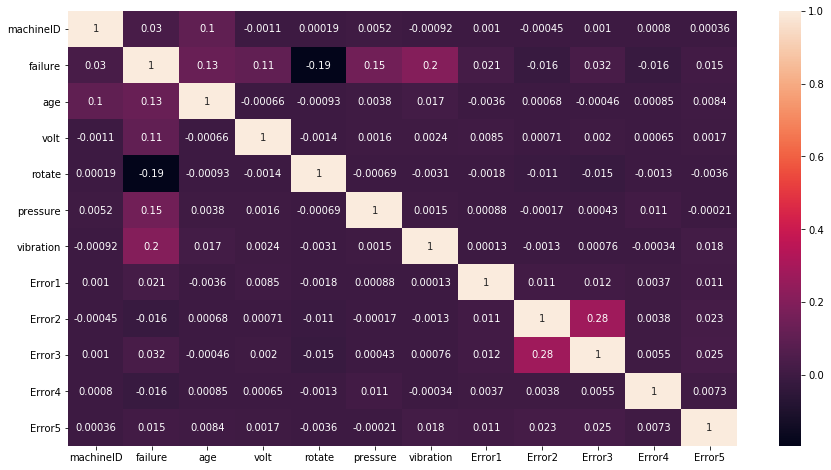

In [30]:
plt.figure(figsize=[15,8])
sb.heatmap(df.corr(),annot=True)

### 2.3.2. Target en Feature selectie

### 2.3.3. Visuele inzichten <a class="anchor" id="VisInzicht"></a><br>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## 2.4. Data cleaning <a class="anchor" id="DataCleaning"></a>

# 3. Uitwerkingen en algoritmen

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [31]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [32]:
dfTelemetry = pd.read_csv ('data\PdM_telemetry.csv')
dfErrors = pd.read_csv ('data\PdM_errors.csv')
dfFailures = pd.read_csv ('data\PdM_failures.csv')
dfMachines = pd.read_csv ('data\PdM_machines.csv')
dfMaint = pd.read_csv ('data\PdM_maint.csv')
print (dfTelemetry.columns)
print (dfErrors.columns)
print (dfFailures.columns)
print (dfMachines.columns)
print (dfMaint.columns)

# print (dfTelemetry.dtypes)
# dfErrors.errorID.to_string()
# print (dfErrors.errorID.dtypes)
# print (dfFailures.dtypes)
# print (dfMachines.dtypes)
# print (dfMaint.dtypes)

# df = pd.concat((dfTelemetry, dfErrors, dfFailures, dfMachines, dfMaint))
# df.head(800)
# df.dtypes

Index(['datetime', 'machineID', 'volt', 'rotate', 'pressure', 'vibration'], dtype='object')
Index(['datetime', 'machineID', 'errorID'], dtype='object')
Index(['datetime', 'machineID', 'failure'], dtype='object')
Index(['machineID', 'model', 'age'], dtype='object')
Index(['datetime', 'machineID', 'comp'], dtype='object')


# Bibliografie
+ [Microsoft Predictive Maintenance](https://www.kaggle.com/arnabbiswas1/microsoft-azure-predictive-maintenance) {1}
+ [What is predictive maintenance?](https://www.fiixsoftware.com/maintenance-strategies/predictive-maintenance/) {2}